## Exploration of Food Outlet

Using the `osmnx` package, we scanned through ths geographical area of England and obtain a list of food stores in the UK. In this notebook, we will inspect the dataframe and observe the quality of the dataframe

In [25]:
import geopandas as gpd 
import pandas as pd 
import numpy as np

# import osm package
from OSMPythonTools.api import Api
import osmnx

## Load the Data

In [26]:
food_store = gpd.read_file("./data/amenities_supermarket.geojson")

In [27]:
# define the bbox of england
country_bound_url = "https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Countries_December_2021_GB_BGC_2022/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"
gdf_country = gpd.read_file(country_bound_url)
# define the boundary box using the geography of England
eng_bound = gdf_country.query("CTRY21NM == 'England'")
bbox = eng_bound.bounds

## Data Preprocessing

In [38]:
food_store[food_store.geometry.within(eng_bound.geometry[0])]

In [29]:
eng_bound.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
# define an experiment small boundary box
nw3 = np.array([-0.185,51.54,-0.16,51.56])
wc2a = np.array([-0.55, 51.51 ,-0.11, 52.03])
# parse to N, S, E, W
bbox =  wc2a
west, south, east, north = bbox[0],bbox[1],bbox[2],bbox[3]

In [22]:
# define the tags
tags = ["supermarket","grocery","convenience","health_food"]
tag_dict= dict(zip(['shop' for _ in range(len(tags))], tags))
amenities = gpd.GeoDataFrame()

# for tag in tags:
#     try:
new_data = osmnx.features_from_bbox(bbox = (north,south,east,west),
                        tags = {"shop":tags}
                        )

     
amenities = pd.concat([amenities,new_data], ignore_index = True)
# return the centroid
amenities.geometry = amenities.centroid

print(f"Total of {len(amenities)} retrieved")

Total of 2296 retrieved


/var/folders/qy/zxn_2n9d69v1cfcx0cnpg6g00000gn/T/ipykernel_19316/4243691499.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  amenities.geometry = amenities.centroid


<Axes: >

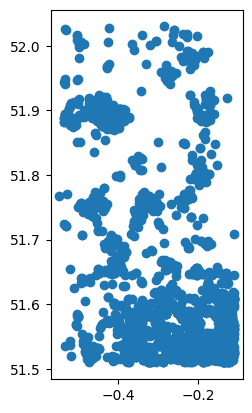

In [24]:
amenities.plot()

In [30]:
osmnx.plot_graph(osmnx.graph_from_place('London, U.K.'))


KeyboardInterrupt: 